In [1]:

import rtree, pygeos
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import folium

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import statsmodels.api as sm

C:\Anaconda3\envs\geo37\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#os.listdir('/dbfs/FileStore/mike.hudgell@os.uk/')

data_path = 'C:/Users/mhudgell/data/'
os.listdir(data_path)

['dft-road-casualty-statistics-accident-last-5-years.csv',
 'dft-road-casualty-statistics-accident-last-5-years_sussex.csv',
 'dft-road-casualty-statistics-casualty-last-5-years.csv',
 'dft-road-casualty-statistics-vehicle-last-5-years.csv',
 'OS VectorMap District (ESRI Shape File) SU',
 'PFA_DEC_2021_EW_BGC.cpg',
 'PFA_DEC_2021_EW_BGC.dbf',
 'PFA_DEC_2021_EW_BGC.prj',
 'PFA_DEC_2021_EW_BGC.shp',
 'PFA_DEC_2021_EW_BGC.shx',
 'Police_Force_Areas_(December_2021)_EW_BGC.xml']

In [3]:
file_path = data_path +'dft-road-casualty-statistics-accident-last-5-years.csv'
print(file_path)
rta = pd.read_csv(file_path)

C:/Users/mhudgell/data/dft-road-casualty-statistics-accident-last-5-years.csv


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
rta.head(2)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,0,5,1,1,0,0,1,1,2,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,0,4,1,1,0,0,1,1,2,E01000375


In [5]:
geometry = [Point(xy) for xy in zip(rta.location_easting_osgr, rta.location_northing_osgr)]
crs = {'init': 'epsg:27700'} #4326
rta_gdf = gpd.GeoDataFrame(rta, crs=crs, geometry=geometry)

C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

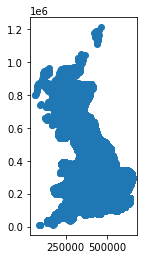

In [6]:
rta_gdf.plot()

In [7]:
police_areas_gdf = gpd.read_file(data_path + 'PFA_DEC_2021_EW_BGC.shp')

<AxesSubplot:>

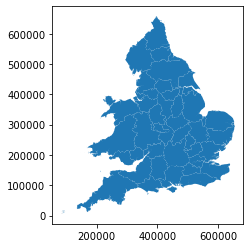

In [8]:
police_areas_gdf.plot()

In [9]:
sussex_poly = police_areas_gdf.loc[police_areas_gdf['PFA21NM'] == 'Sussex'] #.geometry

<AxesSubplot:>

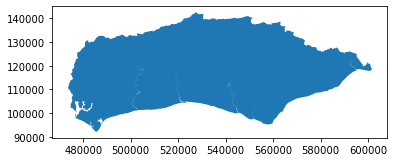

In [10]:
sussex_poly.plot()

In [11]:
rta_gdf

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,geometry
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,5,1,1,0,0,1,1,2,E01000543,POINT (519310.000 188730.000)
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,4,1,1,0,0,1,1,2,E01000375,POINT (551920.000 174560.000)
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,4,1,1,0,0,1,1,2,E01033725,POINT (505930.000 183850.000)
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,1,1,1,0,0,1,1,2,E01003379,POINT (527770.000 168930.000)
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,1,1,1,0,0,1,1,2,E01002583,POINT (510740.000 177230.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,1,0,0,1,1,-1,-1,POINT (343034.000 731654.000)
597969,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,1,1,1,0,0,1,2,-1,-1,POINT (257963.000 658891.000)
597970,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,1,0,0,2,1,-1,-1,POINT (383664.000 810646.000)
597971,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,1,1,1,0,0,1,2,-1,-1,POINT (277161.000 674852.000)


In [12]:
sussex_poly

,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
32,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09,"MULTIPOLYGON (((483325.407 94764.633, 483268.2..."


In [51]:

sussex_rta = gpd.sjoin(rta_gdf, sussex_poly, how="inner")

<AxesSubplot:>

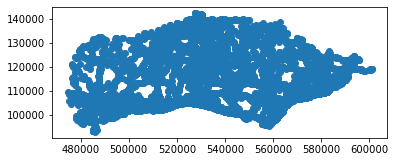

In [52]:
sussex_rta.plot()

In [53]:
sussex_rta.head(1)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,OBJECTID,PFA21CD,PFA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area
108207,2016471600009,2016,471600009,510617.0,102999.0,-0.431144,50.815918,47,3,3,...,33,E23000033,Sussex,556570,117296,0.226848,50.933861,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09


In [54]:
#sussex_rta = rta_gdf

In [55]:
sussex_rta.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,index_right,OBJECTID,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area
count,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.00000,18991.000000,...,18991.000000,18991.000000,18991.0,18991.0,18991.0,18991.0,1.899100e+04,18991.000000,1.899100e+04,1.899100e+04
mean,2017.894845,532337.232005,113084.936022,-0.119320,50.901471,46.999947,2.742615,1.903165,1.31020,4.104629,...,1.255911,1.896899,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
std,1.389326,26128.888034,12000.760736,0.371476,0.107758,0.007256,0.463968,0.742132,0.72289,1.916546,...,0.436383,0.304099,0.0,0.0,0.0,0.0,5.551261e-17,0.000000,6.333160e-08,1.167328e-03
min,2016.000000,474542.000000,92829.000000,-0.941778,50.728749,46.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
25%,2017.000000,515502.000000,104353.500000,-0.359239,50.824784,47.000000,3.000000,1.000000,1.00000,2.000000,...,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
50%,2018.000000,530143.000000,107882.000000,-0.150394,50.852626,47.000000,3.000000,2.000000,1.00000,4.000000,...,1.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
75%,2019.000000,550442.000000,121358.500000,0.139809,50.973178,47.000000,3.000000,2.000000,1.00000,6.000000,...,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09
max,2020.000000,601302.000000,142472.000000,0.863607,51.167286,47.000000,3.000000,14.000000,12.00000,7.000000,...,2.000000,2.000000,32.0,33.0,556570.0,117296.0,2.268480e-01,50.933861,7.119996e+05,3.786718e+09


In [56]:



sussex_rta['date_time'] = sussex_rta['date'] + " " + sussex_rta['time']
sussex_rta['date_time'] = sussex_rta['date_time'] = pd.to_datetime(sussex_rta['date_time'], format="%d/%m/%Y %H:%M")
sussex_rta['ddate'] = sussex_rta['date_time'].dt.date
sussex_rta['year'] = sussex_rta['date_time'].dt.year
sussex_rta['day_of_week'] = sussex_rta['date_time'].dt.day_of_week
sussex_rta['month'] = sussex_rta['date_time'].dt.month
sussex_rta['hour'] = sussex_rta['date_time'].dt.hour
sussex_rta['minute'] = sussex_rta['date_time'].dt.minute
sussex_rta['day_of_year'] = sussex_rta['date_time'].dt.day_of_year
sussex_rta['week_number'] = sussex_rta['date_time'].dt.week
sussex_rta['time'] = sussex_rta['date_time'].dt.time
sussex_rta['number_of_vehicles'] = sussex_rta['number_of_vehicles'].astype(int)
sussex_rta['number_of_casualties'] = sussex_rta['number_of_casualties'].astype(int)

sussex_rta['year_no'] = sussex_rta['year'].astype('string')
sussex_rta['day_no'] = sussex_rta['day_of_year'].astype('string')
sussex_rta['day_no'] = (sussex_rta['day_no']).apply('{:0>3}'.format)
sussex_rta['timeline_string'] = sussex_rta['year_no'] + sussex_rta['day_no']
sussex_rta['timeline'] = sussex_rta['timeline_string'].astype(int)

sussex_rta['year_num'] = sussex_rta['year'].astype('int')
sussex_rta['day_num'] = sussex_rta['day_of_year'].astype('int')


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [57]:
sussex_rta

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,hour,minute,day_of_year,week_number,year_no,day_no,timeline_string,timeline,year_num,day_num
108207,2016471600009,2016,471600009,510617.0,102999.0,-0.431144,50.815918,47,3,3,...,15,46,1,53,2016,001,2016001,2016001,2016,1
108208,2016471600013,2016,471600013,530194.0,104435.0,-0.152876,50.824758,47,2,2,...,21,50,1,53,2016,001,2016001,2016001,2016,1
108209,2016471600027,2016,471600027,561280.0,98915.0,0.285727,50.767339,47,3,1,...,16,43,2,53,2016,002,2016002,2016002,2016,2
108210,2016471600031,2016,471600031,521152.0,118158.0,-0.276645,50.950069,47,2,1,...,23,4,2,53,2016,002,2016002,2016002,2016,2
108211,2016471600034,2016,471600034,548114.0,114306.0,0.105377,50.909161,47,3,1,...,17,35,3,53,2016,003,2016003,2016003,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583677,2020471011403,2020,471011403,494140.0,100877.0,-0.665495,50.799808,47,3,2,...,14,12,357,52,2020,357,2020357,2020357,2020,357
583678,2020471011640,2020,471011640,528425.0,105812.0,-0.177483,50.837591,47,3,2,...,18,15,365,53,2020,365,2020365,2020365,2020,365
583679,2020471013388,2020,471013388,486352.0,104932.0,-0.775027,50.837476,47,3,2,...,15,0,356,52,2020,356,2020356,2020356,2020,356
583680,2020471015947,2020,471015947,512557.0,107575.0,-0.402197,50.856738,47,3,2,...,9,27,330,48,2020,330,2020330,2020330,2020,330


In [61]:
from sklearn.model_selection import train_test_split
#analysis_rta_df = sussex_rta.groupby(['date'], as_index=False)['number_of_casualties'].count()
analysis_rta_df = sussex_rta[['timeline' ,'year_num', 'day_num', 'number_of_vehicles', 'number_of_casualties',
                              'light_conditions', 'weather_conditions', 'road_surface_conditions']]

In [62]:
print(analysis_rta_df.dtypes)
#analysis_rta_df['timeline'] = pd.to_datetime(analysis_rta_df['date_time'])
analysis_rta_df['number_of_casualties'] = analysis_rta_df['number_of_casualties'].astype(float)
print(analysis_rta_df.dtypes)


timeline                   int32
year_num                   int32
day_num                    int32
number_of_vehicles         int32
number_of_casualties       int32
light_conditions           int64
weather_conditions         int64
road_surface_conditions    int64
dtype: object
timeline                     int32
year_num                     int32
day_num                      int32
number_of_vehicles           int32
number_of_casualties       float64
light_conditions             int64
weather_conditions           int64
road_surface_conditions      int64
dtype: object


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
analysis_rta_df = analysis_rta_df.sort_values(by=['timeline'])
analysis_rta_df

,timeline,year_num,day_num,number_of_vehicles,number_of_casualties,light_conditions,weather_conditions,road_surface_conditions
108207,2016001,2016,1,3,1.0,1,8,2
108208,2016001,2016,1,2,1.0,4,2,2
108337,2016001,2016,1,3,1.0,4,1,1
108209,2016002,2016,2,1,1.0,4,2,2
108210,2016002,2016,2,1,2.0,6,1,2
...,...,...,...,...,...,...,...,...
583675,2020366,2020,366,1,1.0,4,1,2
583668,2020366,2020,366,2,1.0,1,1,1
583667,2020366,2020,366,2,1.0,1,1,4
583671,2020366,2020,366,2,1.0,1,1,1


In [197]:
#x_train, x_test, y_train, y_test = train_test_split(analysis_rta_df['date'].values, analysis_rta_df['number_of_casualties'].values,
#                                                    test_size=0.25, shuffle=False)#, stratify=None)

In [67]:
split = 17000

x = analysis_rta_df[['timeline', 'year_num', 'day_num', 'light_conditions', 'number_of_vehicles', 'weather_conditions', 'road_surface_conditions']]
y =  analysis_rta_df['number_of_casualties']

x_train = x[0:split]
y_train = y[0:split]

x_test = x[split:]
y_test = y[split:]

ploting = analysis_rta_df['timeline'][split:]



In [68]:
ploting

581680    2020150
581677    2020150
581686    2020150
581714    2020151
581710    2020151
           ...   
583675    2020366
583668    2020366
583667    2020366
583671    2020366
583672    2020366
Name: timeline, Length: 1991, dtype: int32

In [69]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(17000, 7)
(17000,)
(1991, 7)
(1991,)


In [70]:
x_train = np.asarray(x_train)
#x_train = x_train.reshape(-1,1)
print(x_train.shape)
x_test = np.asarray(x_test)
#x_test = x_test.reshape(-1,1)
print(x_test.shape)


(17000, 7)
(1991, 7)


In [71]:
x_train

array([[2016001,    2016,       1, ...,       3,       8,       2],
       [2016001,    2016,       1, ...,       2,       2,       2],
       [2016001,    2016,       1, ...,       3,       1,       1],
       ...,
       [2020150,    2020,     150, ...,       3,       1,       1],
       [2020150,    2020,     150, ...,       2,       9,       1],
       [2020150,    2020,     150, ...,       2,       1,       1]],
      dtype=int64)

In [72]:
y_train

108207    1.0
108208    1.0
108337    1.0
108209    1.0
108210    2.0
         ... 
581674    1.0
581689    1.0
581679    2.0
581683    1.0
581681    1.0
Name: number_of_casualties, Length: 17000, dtype: float64

In [73]:
x_test

array([[2020150,    2020,     150, ...,       1,       1,       1],
       [2020150,    2020,     150, ...,       2,       8,       1],
       [2020150,    2020,     150, ...,       2,       1,       1],
       ...,
       [2020366,    2020,     366, ...,       2,       1,       4],
       [2020366,    2020,     366, ...,       2,       1,       1],
       [2020366,    2020,     366, ...,       1,       1,       1]],
      dtype=int64)

In [74]:
y_test

581680    1.0
581677    1.0
581686    1.0
581714    1.0
581710    1.0
         ... 
583675    1.0
583668    1.0
583667    1.0
583671    1.0
583672    1.0
Name: number_of_casualties, Length: 1991, dtype: float64

In [75]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

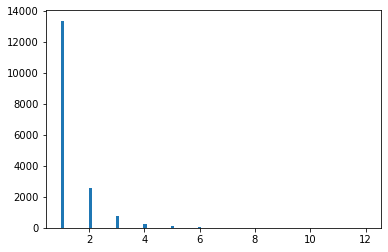

In [76]:
plt.hist(y_train, 100)
plt.show()


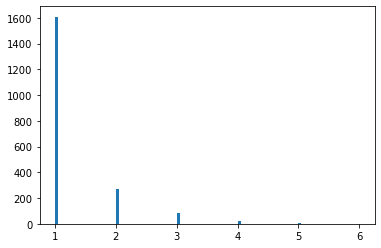

In [77]:
plt.hist(y_test, 100)
plt.show()



In [78]:
RF_Model = RandomForestRegressor(n_estimators=1000, verbose=1, bootstrap=False, n_jobs=10)#, random_state = 21)
RF_Model.fit(x_train, y_train)


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    3.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    6.1s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    7.8s finished


RandomForestRegressor(bootstrap=False, n_estimators=1000, n_jobs=10, verbose=1)

In [79]:
y_predict = RF_Model.predict(x_test)


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [80]:
RF_Model.score(x_test, y_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.0s finished


-1.1538062420440367

In [81]:
RF_Model.estimators_
#reg = RandomForestRegressor(n_estimators = 300)
#reg.fit(X, y.values.ravel())

#y_pred = reg.predict(X_pred)

[DecisionTreeRegressor(max_features='auto', random_state=329687881),
 DecisionTreeRegressor(max_features='auto', random_state=1727720993),
 DecisionTreeRegressor(max_features='auto', random_state=1749654028),
 DecisionTreeRegressor(max_features='auto', random_state=371169187),
 DecisionTreeRegressor(max_features='auto', random_state=1385650455),
 DecisionTreeRegressor(max_features='auto', random_state=973387280),
 DecisionTreeRegressor(max_features='auto', random_state=1986651241),
 DecisionTreeRegressor(max_features='auto', random_state=2135329189),
 DecisionTreeRegressor(max_features='auto', random_state=107859765),
 DecisionTreeRegressor(max_features='auto', random_state=1827341445),
 DecisionTreeRegressor(max_features='auto', random_state=294132397),
 DecisionTreeRegressor(max_features='auto', random_state=1507099406),
 DecisionTreeRegressor(max_features='auto', random_state=1486008612),
 DecisionTreeRegressor(max_features='auto', random_state=835031771),
 DecisionTreeRegressor(max

In [87]:
results_df = pd.DataFrame(y_test)
results_df = results_df.rename(columns={results_df.columns[0]:'actual'})
results_df['predicted'] = y_predict
#results_df['timeline'] =  ploting
#results_df.set_index('timeline', inplace=True) 





<AxesSubplot:>

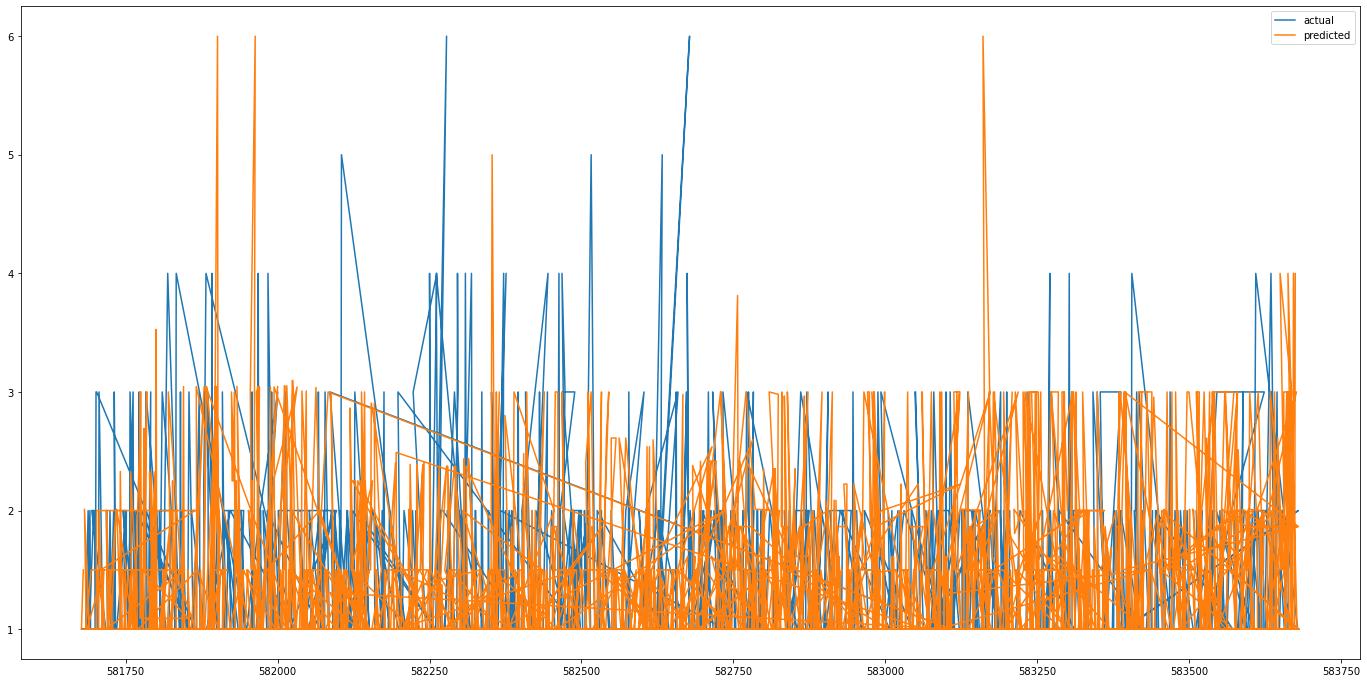

In [105]:
fig, ax = plt.subplots(figsize=(24, 12))
results_df.plot.line(ax=ax)



In [89]:
results_df


,actual,predicted
581680,1.0,1.5
581677,1.0,1.0
581686,1.0,1.0
581714,1.0,1.5
581710,1.0,1.0
...,...,...
583675,1.0,4.0
583668,1.0,1.0
583667,1.0,3.0
583671,1.0,1.0


In [90]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [91]:
predictions = y_predict
actial = y_test



In [92]:
mae = mean_absolute_error(actial, predictions)
R2 = r2_score(actial, predictions)
mse = mean_squared_error(actial, predictions)
rmse = np.sqrt(R2)

print(mae)

0.5655100071534025


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [93]:
print(RF_Model.feature_importances_)

[0.40465347 0.01533311 0.3300395  0.06680821 0.09016703 0.06583034
 0.02716834]
